In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from io import BufferedReader, open

In [3]:
import google.protobuf.internal.decoder as decoder

In [4]:
def ReadItm(fname, constructor, size_limit = 0):
    ''' Reads and parses a length prefixed protobuf messages from file. 
        The file MUST not be corrupted. The parsing is equivalent to parseDelimitedFrom.
        http://dev.pawelsz.eu/2016/05/read-from-file-length-prefixed-protocol.html
    '''
    f = None
    if fname.endswith('.gzip'):
        f = gzip.open(fname, 'rb')
    else:
        f = open(fname, 'rb')
    reader = BufferedReader(f)
    bytes_read = 0
    while size_limit<=0 or bytes_read<size_limit:
        buffer = reader.peek(10)
        if len(buffer) == 0:
            break
        (size, position) = decoder._DecodeVarint(buffer, 0)
        reader.read(position)
        itm = constructor()
        itm.ParseFromString(reader.read(size))
        bytes_read = bytes_read + position + size
        yield itm
    f.close()

In [5]:
import behavior_pb2, maze_pb2

In [6]:
behavior = ReadItm('../sessions/000000/behavior/behavior.data', behavior_pb2.Data)

In [7]:
deltaTime = [x.deltaTime/1000.0 for x in behavior]

(0, 0.1)

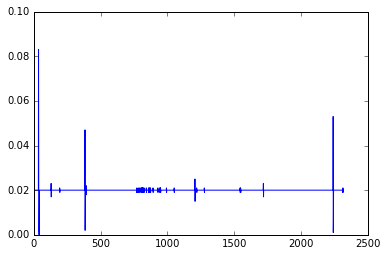

In [8]:
plt.plot(deltaTime)
plt.ylim([0, .1])

In [16]:
maze = ReadItm('../sessions/000000/behavior/maze.data', maze_pb2.Data)

In [17]:
trial = [x.maze.area for x in maze]

In [18]:
print trial

[[], [], [], [], [], []]


In [14]:
list(maze)

[maze {
   area {
   }
   borders {
   }
   borders {
   }
   links {
   }
   links {
   }
   triggers {
   }
   name: "twoChoice.maze"
 }
 trial: 0
 init: true
 link: false
 advance: false, maze {
   area {
   }
   borders {
   }
   borders {
   }
   links {
   }
   links {
   }
   triggers {
   }
   name: "twoChoiceAlt.maze"
 }
 trial: 1
 init: false
 link: true
 advance: false, maze {
   area {
   }
   borders {
   }
   borders {
   }
   links {
   }
   links {
   }
   triggers {
   }
   name: "twoChoice.maze"
 }
 trial: 2
 init: false
 link: true
 advance: false, maze {
   area {
   }
   borders {
   }
   borders {
   }
   links {
   }
   links {
   }
   triggers {
   }
   name: "twoChoiceAlt.maze"
 }
 trial: 3
 init: false
 link: true
 advance: false, maze {
   area {
   }
   borders {
   }
   borders {
   }
   links {
   }
   links {
   }
   triggers {
   }
   name: "twoChoice.maze"
 }
 trial: 4
 init: false
 link: true
 advance: false, maze {
   area {
   }
   borders {
   }
   